In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [2]:
# Reading the input file
prime = pd.read_csv("3' UTR DENV1 DF + DHF.csv", header=None)

# Printing the shape of the data
print("The shape of 3' data is:", str(prime.shape))

The shape of 3' data is: (21, 2)


In [3]:
# Making the disease label column
severity = []
for disease in prime[0]:
    if disease == "DF":
        severity.append(0)
    elif disease == "DHF":
        severity.append(1)
    else:
        continue

dengue = pd.DataFrame(columns = ["Sequence", "Disease"])
dengue["Sequence"] = prime[1]
dengue["Disease"] = severity

dengue = dengue.sample(frac = 1)

print(dengue.head())

                     Sequence  Disease
9   CCACUCCCACCAAUGAAAACGGAGA        0
7   CCACUUCCAAUGAUAAAAACGGUAA        0
14  CCACUUUCAAUGGCAAAAACGGAGA        0
4   UCAACUUCAAUGAUAAGAACGGAGA        1
2   CUAAUUUUAAUGAUAAGAUCGGAGA        0


In [4]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

dengue['words'] = dengue.apply(lambda x: getKmers(x['Sequence']), axis=1)
dengue = dengue.drop('Sequence', axis=1)

dengue_texts = list(dengue['words'])
for item in range(len(dengue_texts)):
    dengue_texts[item] = ' '.join(dengue_texts[item])

The shape of y is: (21,)


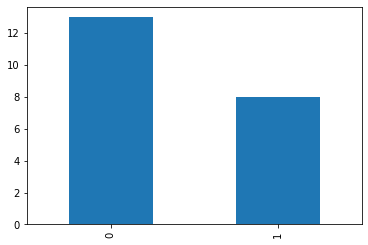

In [5]:
# Creating y and printing the shape of it
y = dengue.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
dengue["Disease"].value_counts().sort_index().plot.bar()

In [6]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(dengue_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (21, 123)


## Nested Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of C for Logistic Regression
Tree_list = [10, 100, 1000, 5000]
# empty list to store scores
RF_scores = []

In [8]:
from sklearn.ensemble import RandomForestClassifier
# 1. we will loop through reasonable values of k
for trees in Tree_list:
    # 2. run RandomForestClassifier with trees trees
    lr = RandomForestClassifier(n_estimators = trees, criterion = 'entropy', random_state = 0)
    # 3. obtain cross_val_score for RandomForestClassifier with trees trees
    scores = cross_val_score(lr, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for trees trees to RF_scores list
    RF_scores.append(scores.mean())
    
    print("The score for trees  =", trees, "is:", scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The score for trees  = 10 is: 0.6666666666666666
The score for trees  = 100 is: 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The score for trees  = 1000 is: 0.6333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The score for trees  = 5000 is: 0.6333333333333333


In [9]:
# search for an optimal value of C for Logistic Regression
Tree_list2 = [3, 6, 9, 12, 15]
# empty list to store scores
RF_scores2 = []

In [10]:
# 1. we will loop through reasonable values of k
for trees in Tree_list2:
    # 2. run RandomForestClassifier with trees trees
    lr = RandomForestClassifier(n_estimators = trees, criterion = 'entropy', random_state = 0)
    # 3. obtain cross_val_score for RandomForestClassifier with trees trees
    scores = cross_val_score(lr, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for trees trees to RF_scores list
    RF_scores2.append(scores.mean())
    
    print("The score for trees  =", trees, "is:", scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The score for trees  = 3 is: 0.6
The score for trees  = 6 is: 0.6333333333333333
The score for trees  = 9 is: 0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


The score for trees  = 12 is: 0.6333333333333333
The score for trees  = 15 is: 0.6333333333333333
